In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')  

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install tensorflowjs 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflowjs as tfjs

In [ ]:
import pathlib
import matplotlib.pyplot as plt
from IPython.display import HTML
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    pathlib.Path('/content/drive/MyDrive/potato-disease'),
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2161 files belonging to 3 classes.


In [ ]:
cn = ds.class_names
cn

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(ds)

68

In [ ]:
train_size = 0.8
len(ds)*train_size

54.400000000000006

In [ ]:
train_ds = ds.take(54)
len(train_ds)

54

In [ ]:
test_ds = ds.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(ds)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 

In [ ]:
scaling = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
aug = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2), 
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (aug(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    scaling,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile( 
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)  

In [ ]:
training = model.fit( 
    train_ds, 
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
54/54 [==============================] - 398s 3s/step - loss: 0.9161 - accuracy: 0.4815 - val_loss: 0.9500 - val_accuracy: 0.4688
Epoch 2/5
54/54 [==============================] - 127s 2s/step - loss: 0.7572 - accuracy: 0.6343 - val_loss: 0.5386 - val_accuracy: 0.7812
Epoch 3/5
54/54 [==============================] - 123s 2s/step - loss: 0.4733 - accuracy: 0.8044 - val_loss: 0.3963 - val_accuracy: 0.8333
Epoch 4/5
54/54 [==============================] - 122s 2s/step - loss: 0.3300 - accuracy: 0.8709 - val_loss: 0.3781 - val_accuracy: 0.8438
Epoch 5/5
54/54 [==============================] - 124s 2s/step - loss: 0.2566 - accuracy: 0.9028 - val_loss: 0.2547 - val_accuracy: 0.9010


In [ ]:
accuracy=model.evaluate(test_ds) 
accuracy

8/8 [==============================] - 8s 596ms/step - loss: 0.2374 - accuracy: 0.9212


[0.23742079734802246, 0.9211618304252625]

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 675ms/step
predicted label: Potato___Early_blight


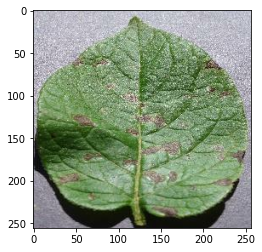

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    f_image = images_batch[0].numpy().astype('uint8')
    f_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(f_image)
    print("actual label:",cn[f_label])
    
    batch_predict = model.predict(images_batch)
    print("predicted label:",cn[np.argmax(batch_predict[1])])

In [ ]:
def predict(img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = cn[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


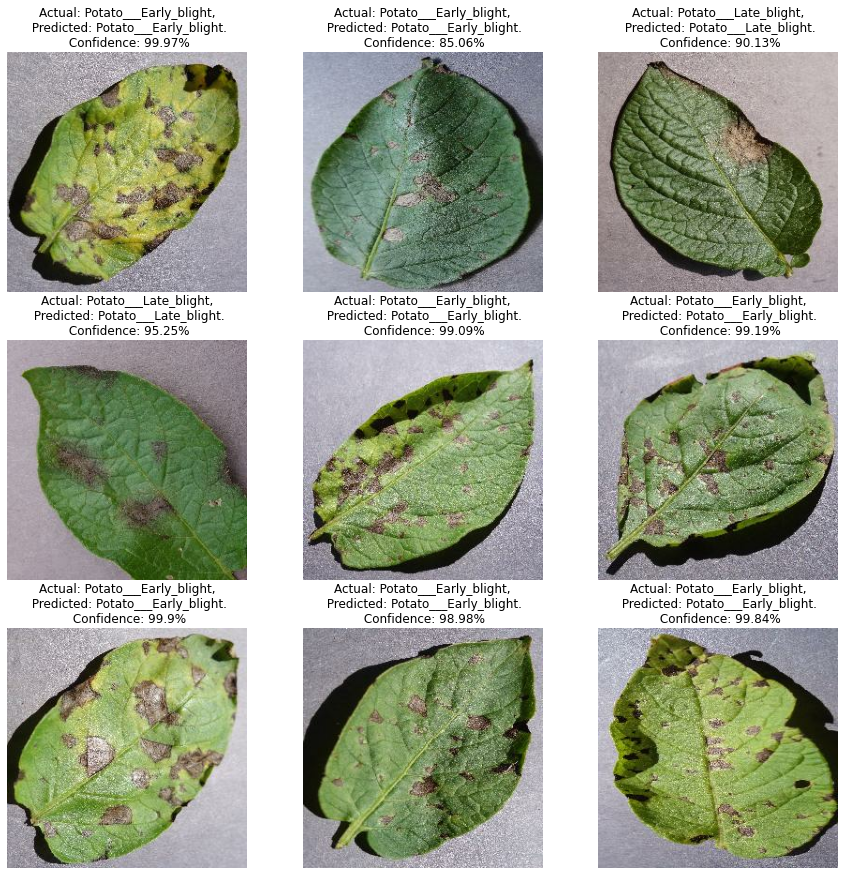

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(images[i].numpy())
        actual_class = cn[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
tfjs.converters.save_keras_model(model,'models')